In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare
import wrangle
import explore

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
def get_salary_data():
    df = pd.read_csv('Levels_Fyi_Salary_Data.csv')
    return df

In [3]:
def clean_salary_data(df):
    '''
    This function creates a dummy variable for title and concats it with the current dataframe,
    Drops columns that are not useful, or would make the dataset too large to use dummies on,
    Drops nulls, removes any rows that do not have education documented, renames some columns,
    for readability, and finally adds a column for highly experienced.
    '''
    dummy_df = pd.get_dummies(df[['title']])
    dummy_df.columns = [col.lower().replace(" ","_") for col in dummy_df]
    df = pd.concat([df, dummy_df], axis=1)
    df.drop(columns = ['timestamp',
    'Race',
    'Education',
    'otherdetails',
    'gender',
    'rowNumber',
    'Race_Asian',
    'Race_White',
    'Race_Two_Or_More',
    'Race_Black',
    'Race_Hispanic',
    'company',
    'level',
    'location',
    'tag',
    'title'],inplace = True)
    df.dropna(inplace = True)
    df = df[df.Highschool + df.Some_College + df.Bachelors_Degree + df.Masters_Degree + df.Doctorate_Degree > 0]
    df.rename(columns = {'Masters_Degree':'masters_degree',
                        'Bachelors_Degree':'bachelors_degree',
                        'Doctorate_Degree':'doctorate_degree',
                        'Highschool':'highschool',
                        'Some_College':'some_college',
                        'totalyearlycompensation':'total_earnings'},inplace = True)
    df['highly_experenced'] = df.yearsofexperience >= 4
    return df

In [4]:
def train_validate_test(df, target):
    # split df into test (20%) and train_validate (80%)
    train_validate, test = train_test_split(df, test_size=.2, random_state=174)
    # split train/validate into train (60%) and validate (20%)
    train, validate = train_test_split(train_validate, test_size=.25, random_state=174)
    # splits our target off of our train, validate, test
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

In [5]:
def min_max_scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs 
    """
    scaler = MinMaxScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [6]:
def wrangle_salary_data():
    df = get_salary_data()
    df = clean_salary_data(df)
    train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df,target = 'total_earnings')
    scaler, X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scaler(X_train, X_validate, X_test)
    return df, train, validate, test, X_train, X_train_scaled , y_train, X_validate, X_validate_scaled , y_validate, X_test, X_test_scaled , y_test, scaler

In [7]:
df = get_salary_data()

In [8]:
df = clean_salary_data(df)

In [9]:
df, train, validate, test, X_train, X_train_scaled , y_train, X_validate, X_validate_scaled , y_validate, X_test, X_test_scaled , y_test, scaler = wrangle_salary_data()

In [10]:
train.shape

(18222, 29)

In [11]:
validate.shape

(6074, 29)

In [12]:
test.shape

(6074, 29)

In [13]:
y_train

20114    129000
33378    320000
39464    126000
52434     55000
52823    254000
          ...  
34999     82000
37073    191000
55176    134000
43585    112000
13701    142000
Name: total_earnings, Length: 18222, dtype: int64

In [14]:
df = pd.read_csv('Levels_Fyi_Salary_Data.csv')

In [15]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [16]:
df.shape

(62642, 29)

In [17]:
df.tag.value_counts()

Full Stack                        11382
Distributed Systems (Back-End)    10838
API Development (Back-End)         6277
ML / AI                            4204
Web Development (Front-End)        2971
                                  ...  
Google Cloud, Sales,                  1
Not Given                             1
Government & Public Service           1
ODC                                   1
Consumer engagement                   1
Name: tag, Length: 3058, dtype: int64

In [18]:
df.isnull().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

In [19]:
df.drop(columns = ['timestamp','Race','Education','otherdetails','gender','rowNumber'],inplace = True)

In [20]:
df.drop(columns = ['Race_Asian','Race_White','Race_Two_Or_More','Race_Black','Race_Hispanic'],inplace = True)

In [21]:
df.dropna(inplace = True)

In [22]:
df.columns

Index(['company', 'level', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'cityid', 'dmaid', 'Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College'],
      dtype='object')

In [23]:
df.isnull().sum()

company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
cityid                     0
dmaid                      0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
dtype: int64

In [24]:
df.dropna(inplace = True)

In [25]:
df.isnull().sum()

company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
cityid                     0
dmaid                      0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
dtype: int64

In [26]:
df.head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,cityid,dmaid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College
409,Yahoo,IC2,Software Engineer,160500,"Sunnyvale, CA",0.58,0.58,Full Stack,128000.0,13000.0,19200.0,7472,807.0,0,0,0,0,0
410,Oracle,M3,Software Engineering Manager,340000,"Redwood City, CA",16.00,15.00,Distributed Systems (Back-End),206000.0,134000.0,0.0,7392,807.0,0,0,0,0,0
411,Qualcomm,Senior Staff Engineer,Software Engineer,240000,"Santa Clara, CA",15.00,6.00,Embedded Systems,0.0,0.0,0.0,7434,807.0,0,0,0,0,0
412,Splunk,P2,Software Engineer,160000,"Seattle, WA",5.00,3.00,Full Stack,0.0,0.0,0.0,11527,819.0,0,0,0,0,0
413,Google,L3,Software Engineer,208000,"Mountain View, CA",0.00,0.00,Distributed Systems (Back-End),116000.0,65000.0,17000.0,7322,807.0,0,0,0,0,0


In [27]:
df.Highschool.value_counts()

0    61346
1      319
Name: Highschool, dtype: int64

In [28]:
df.Some_College.value_counts()

0    61310
1      355
Name: Some_College, dtype: int64

In [29]:
df.Bachelors_Degree.value_counts()

0    49097
1    12568
Name: Bachelors_Degree, dtype: int64

In [30]:
df.Masters_Degree.value_counts()

0    46324
1    15341
Name: Masters_Degree, dtype: int64

In [31]:
df.Doctorate_Degree.value_counts()

0    59867
1     1798
Name: Doctorate_Degree, dtype: int64

In [32]:
df = df[df.Highschool + df.Some_College + df.Bachelors_Degree + df.Masters_Degree + df.Doctorate_Degree > 0]

In [33]:
df.shape

(30277, 18)

In [34]:
df.head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,cityid,dmaid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College
717,Facebook,E4,Software Engineer,239000,"Menlo Park, CA",4.0,0.0,ML / AI,140000.0,60000.0,39000.0,7300,807.0,0,0,1,0,0
3427,Capital One,Senior Associate,Data Scientist,125000,"Washington, DC",1.0,0.0,ML / AI,121000.0,0.0,4000.0,40303,511.0,0,0,1,0,0
5037,Bloomberg,Software Engineer,Software Engineer,170000,"New York, NY",0.0,0.0,Distributed Systems (Back-End),142000.0,0.0,18000.0,10182,501.0,1,0,0,0,0
5392,Amazon,L5,Data Scientist,332000,"Palo Alto, CA",1.0,0.0,Optimization,185000.0,17000.0,130000.0,7351,807.0,0,0,1,0,0
6055,Apple,ICT3,Software Engineer,240000,"Cupertino, CA",3.0,3.0,ML / AI,150000.0,75000.0,15000.0,7158,807.0,0,0,1,0,0


In [35]:
df.columns

Index(['company', 'level', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'cityid', 'dmaid', 'Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College'],
      dtype='object')

In [36]:
df['highly_experenced'] = df.yearsofexperience >= 4

In [37]:
df.head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,cityid,dmaid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,highly_experenced
717,Facebook,E4,Software Engineer,239000,"Menlo Park, CA",4.0,0.0,ML / AI,140000.0,60000.0,39000.0,7300,807.0,0,0,1,0,0,True
3427,Capital One,Senior Associate,Data Scientist,125000,"Washington, DC",1.0,0.0,ML / AI,121000.0,0.0,4000.0,40303,511.0,0,0,1,0,0,False
5037,Bloomberg,Software Engineer,Software Engineer,170000,"New York, NY",0.0,0.0,Distributed Systems (Back-End),142000.0,0.0,18000.0,10182,501.0,1,0,0,0,0,False
5392,Amazon,L5,Data Scientist,332000,"Palo Alto, CA",1.0,0.0,Optimization,185000.0,17000.0,130000.0,7351,807.0,0,0,1,0,0,False
6055,Apple,ICT3,Software Engineer,240000,"Cupertino, CA",3.0,3.0,ML / AI,150000.0,75000.0,15000.0,7158,807.0,0,0,1,0,0,False


In [38]:
df, train, validate, test, X_train, X_train_scaled , y_train, X_validate, X_validate_scaled , y_validate, X_test, X_test_scaled , y_test, scaler = wrangle.wrangle_salary_data()

In [39]:
df.head()

,total_earnings,yearsofexperience,yearsatcompany,cityid,dmaid,masters_degree,bachelors_degree,doctorate_degree,highschool,some_college,...,title_mechanical_engineer,title_product_designer,title_product_manager,title_recruiter,title_sales,title_software_engineer,title_software_engineering_manager,title_solution_architect,title_technical_program_manager,highly_experienced
46,320000,4.0,1.0,7419,807.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
717,239000,4.0,0.0,7300,807.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3427,125000,1.0,0.0,40303,511.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5037,170000,0.0,0.0,10182,501.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5392,332000,1.0,0.0,7351,807.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df.total_earnings.mean()

206454.26407639118

In [41]:
education_levels = ['masters_degree','bachelors_degree','doctorate_degree','highschool','some_college']

education_level: masters_degree
220731.07660320966
__________________________


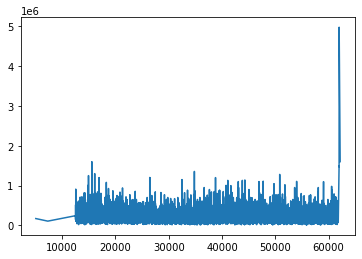

__________________________
education_level: bachelors_degree
177835.06545021816
__________________________


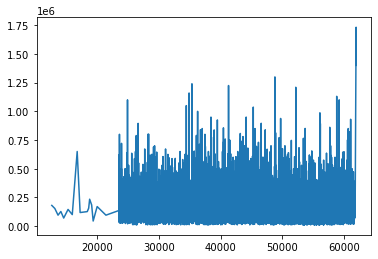

__________________________
education_level: doctorate_degree
294220.1885745979
__________________________


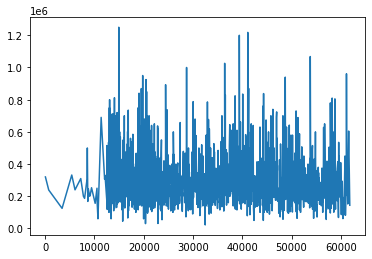

__________________________
education_level: highschool
187731.25
__________________________


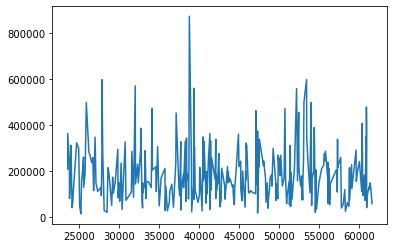

__________________________
education_level: some_college
210121.12676056338
__________________________


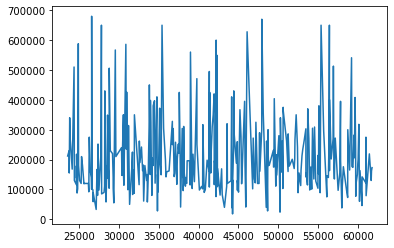

__________________________


In [42]:
for education in education_levels:
    holder_df = df[df[education] == 1]
    print(f'education_level: {education}')
    print(holder_df.total_earnings.mean())
    print('__________________________')
    holder_df.total_earnings.plot()
    plt.show()
    print('__________________________')

In [43]:
doctorate_df = df[df.doctorate_degree == 1]

In [44]:
doctorate_df.total_earnings.mean()

294220.1885745979

In [45]:
df.head()

,total_earnings,yearsofexperience,yearsatcompany,cityid,dmaid,masters_degree,bachelors_degree,doctorate_degree,highschool,some_college,...,title_mechanical_engineer,title_product_designer,title_product_manager,title_recruiter,title_sales,title_software_engineer,title_software_engineering_manager,title_solution_architect,title_technical_program_manager,highly_experienced
46,320000,4.0,1.0,7419,807.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
717,239000,4.0,0.0,7300,807.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3427,125000,1.0,0.0,40303,511.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5037,170000,0.0,0.0,10182,501.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5392,332000,1.0,0.0,7351,807.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df = acquire.get_salary_data()

In [47]:
df = clean_salary_data(df)

In [48]:
df.shape

(30370, 29)

In [49]:
df.head()

,total_earnings,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,masters_degree,bachelors_degree,...,title_mechanical_engineer,title_product_designer,title_product_manager,title_recruiter,title_sales,title_software_engineer,title_software_engineering_manager,title_solution_architect,title_technical_program_manager,highly_experenced
46,320000,4.0,1.0,210000.0,80000.0,30000.0,7419,807.0,0,0,...,0,0,0,0,0,1,0,0,0,True
717,239000,4.0,0.0,140000.0,60000.0,39000.0,7300,807.0,0,0,...,0,0,0,0,0,1,0,0,0,True
3427,125000,1.0,0.0,121000.0,0.0,4000.0,40303,511.0,0,0,...,0,0,0,0,0,0,0,0,0,False
5037,170000,0.0,0.0,142000.0,0.0,18000.0,10182,501.0,1,0,...,0,0,0,0,0,1,0,0,0,False
5392,332000,1.0,0.0,185000.0,17000.0,130000.0,7351,807.0,0,0,...,0,0,0,0,0,0,0,0,0,False


In [50]:
df,train,validate,test = wrangle.wrangle_explore_salary_data()

In [51]:
df.shape

(30277, 21)

In [52]:
train

,company,level,title,total_earnings,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,...,cityid,dmaid,masters_degree,bachelors_degree,doctorate_degree,highschool,some_college,gender_male,gender_other,highly_experienced
12527,Bloomberg,Software Engineer,Software Engineer,155000,"New York, NY",0.0,0.0,API Development (Back-End),140000.0,0.0,...,10182,501.0,1,0,0,0,0,1,0,0
38654,Google,L5,Data Scientist,264000,"Mountain View, CA",8.0,2.0,Sales,173000.0,57000.0,...,7322,807.0,1,0,0,0,0,0,0,1
24550,Applied Materials,E3,Mechanical Engineer,134000,"Santa Clara, CA",6.0,1.0,Mechanical Design Engineer,123000.0,1000.0,...,7434,807.0,1,0,0,0,0,1,0,1
47097,Hp Inc,V,Software Engineer,114000,"Palo Alto, CA",4.0,2.0,API Development (Back-End),100000.0,2000.0,...,7351,807.0,1,0,0,0,0,1,0,1
29330,Facebook,IC6,Marketing,305000,"Menlo Park, CA",8.0,0.0,Product,210000.0,50000.0,...,7300,807.0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33045,Atlassian,L5,Product Manager,229000,"Sydney, NS, Australia",5.0,5.0,Product,125000.0,85000.0,...,1311,0.0,0,1,0,0,0,0,0,1
40673,Amazon,L5,Software Engineer,205000,"Seattle, WA",5.0,3.0,Distributed Systems (Back-End),142000.0,62000.0,...,11527,819.0,1,0,0,0,0,1,0,1
60342,Adobe,Software Engineer 4,Software Engineer,262000,"San Jose, CA",8.0,8.0,API Development (Back-End),168000.0,70000.0,...,7422,807.0,1,0,0,0,0,1,0,1
21108,Amazon,L5,Software Engineer,196000,"Cambridge, MA",2.0,2.0,API Development (Back-End),153000.0,43000.0,...,8821,506.0,1,0,0,0,0,0,0,0


In [53]:
df.drop(columns = ['gender_title:_senior_software_engineer','gender_female'],inplace = True)

KeyError: "['gender_title:_senior_software_engineer' 'gender_female'] not found in axis"

In [ ]:
df.head()

In [ ]:
df = df[df.useless_title == 0]

In [ ]:
df.shape